# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ml import *

# Cas de tests, rendu 2

## Classification

### Linear Simple :
        Linear Model : OK
        MLP (2, 1)   : OK

In [12]:
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
])
Y = np.array([
      1,
      -1,
      -1
])

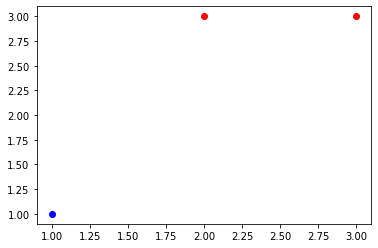

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
plt.show()
plt.clf()

In [14]:
model_dim = len(X[0])

errors = 0

for _ in range(50):
    test_after = []
    p_model = create_linear_model(model_dim)

    train_linear_classification_model(p_model, model_dim, X, Y, alpha=0.001, epochs=10_000)

    for data, expected in zip(X, Y):
        out = predict_linear_model_classif(p_model, model_dim, data)
        test_after.append(out)
        if out != expected:
            errors += 1
    print(test_after)
    destroy_linear_model(p_model)

print(f"errors: {errors}")

[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
[1.0, -1.0, -1.0]
errors: 0


### Linear model (simple)

In [31]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim, [1, 1])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y, alpha=0.001, epochs=10000)


test_after = predict_linear_model_classif(p_model, input_dim , [1, 1])

print("After training:",test_after)

Before training: 1.0
After training: 1.0


### Linear model (advanced)

In [2]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1, 5, 0.5) for x2 in np.arange(-1, 5, 0.5)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p) for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_classification_model(model, input_dim, flattened_dataset_inputs, Y, epochs=10000)


predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim, [1, 1])

print("Prediction after training of [1, 1], the prediction need to be equal to 1. \nPrediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

NameError: name 'input_dim' is not defined

### MLP (simple)

In [38]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1, 1])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("After training:", test_after)

Before training: [0.5709964]
After training: [0.57625884]


### MLP (advanced)

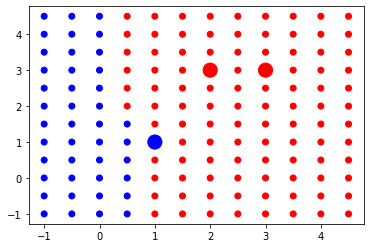

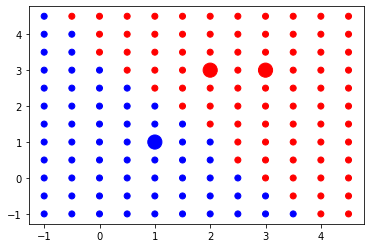

Prediction after training of [1, 1], the result need to be equal to 1. Result: [0.57625884]


In [39]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1, 5, 0.5) for x2 in np.arange(-1, 5, 0.5)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### Linear Multiple :
        Linear Model : OK
        MLP (2, 1)   : OK

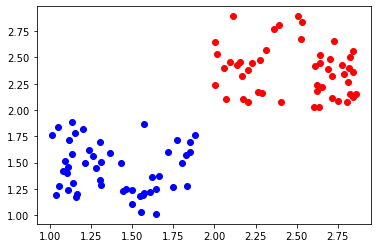

<Figure size 432x288 with 0 Axes>

In [40]:
X = np.concatenate([np.random.random((50,2)) * 0.9 + np.array([1, 1]), np.random.random((50,2)) * 0.9 + np.array([2, 2])])
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0])
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red')
plt.show()
plt.clf()

### Linear model (simple)

In [41]:
input_dim = len(X[0])
print(input_dim)

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim, [1.25, 1.25])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("After training:",test_after)

2
Before training: -1.0
After training: -1.0


### Linear model (advanced)

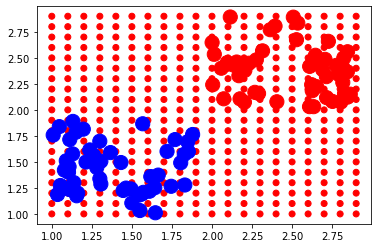

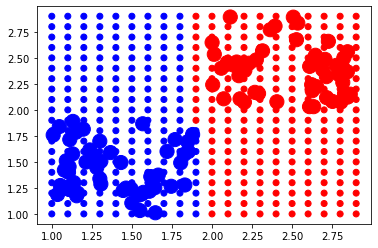

Prediction: -1.0


In [71]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(1, 3, 0.1) for x2 in np.arange(1, 3, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])
    #print(flattened_dataset_inputs)

train_linear_classification_model(model, input_dim, X, Y, epochs=100000)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [2.5, 2.5])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

### MLP (simple)

In [72]:
input_dim = [len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1.25, 1.25])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1.25, 1.25])

print("After training:", test_after)

Before training: [0.19136146]
After training: [0.39855596]


### MLP (advanced)

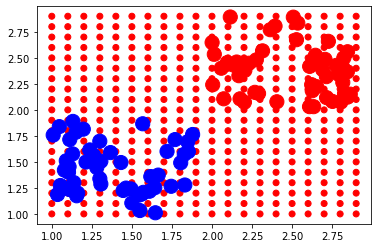

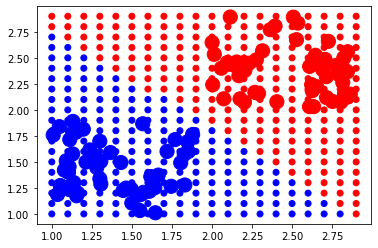

Prediction: [0.54824686]


In [86]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(1, 3, 0.1) for x2 in np.arange(1, 3, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y, epochs=100000)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### XOR :
        Linear Model    : KO
        MLP (2, 2, 1)   : OK

In [70]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([1, 1, -1, -1])

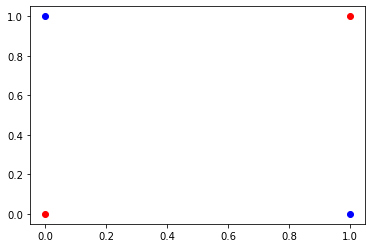

<Figure size 432x288 with 0 Axes>

In [72]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

### Linear model (simple)

In [73]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("After training:",test_after)

Before training: 1.0
After training: 1.0


### Linear model (advanced)

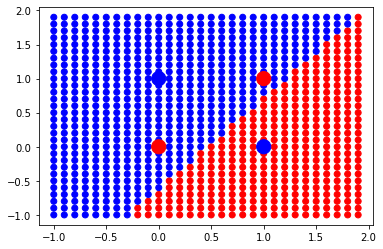

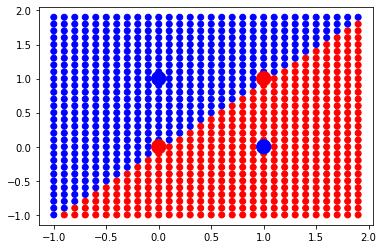

Prediction: 1.0


In [74]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1, 2, 0.1) for x2 in np.arange(-1, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_classification_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

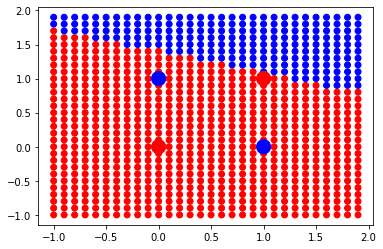

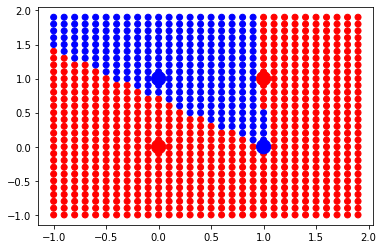

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from ml import *


X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, 1, 1, -1])

input_dim = len(X[0])

model_top = create_linear_model(input_dim)
model_bottom = create_linear_model(input_dim)


test_dataset = [[x1, x2] for x1 in np.arange(-1, 2, 0.1) for x2 in np.arange(-1, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs_top = [predict_linear_model_classif(model_top, input_dim,  p)  for p in test_dataset]
predicted_outputs_bottom = [predict_linear_model_classif(model_bottom, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if top == 1 and bottom == 1 else 'red' for (top, bottom) in zip(predicted_outputs_top, predicted_outputs_bottom)]
#predicted_outputs_colors_bottom = ['blue' if label == 1 else 'red' for label in predicted_outputs_top]


plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#print(X[:-1], Y[:-1])
#print(X[1:], Y[1:])

train_linear_classification_model(model_top, input_dim, X[:-1], Y[:-1], epochs=100000)
train_linear_classification_model(model_bottom, input_dim, X[1:], Y[1:], epochs=100000)


predicted_outputs_top = [predict_linear_model_classif(model_top, input_dim,  p)  for p in test_dataset]
predicted_outputs_bottom = [predict_linear_model_classif(model_bottom, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if top == 1 and bottom == 1 else 'red' for (top, bottom) in zip(predicted_outputs_top, predicted_outputs_bottom)]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

#print("Prediction:", test_after)

destroy_linear_model(model_top)
destroy_linear_model(model_bottom)

### MLP (simple)

In [99]:
input_dim = [len(X[0]), len(X[0]), 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [1, 1])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("After training:", test_after)

Before training: [0.358729]
After training: [-0.19403116]


### MLP (advanced)

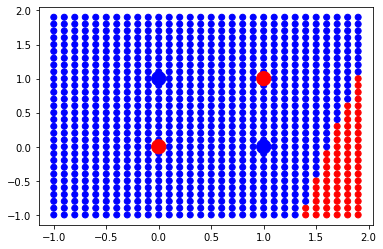

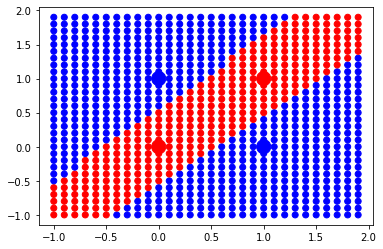

Prediction after training of [1, 1], the result need to be equal to 1. Result: [-0.19403116]


In [106]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1, 2, 0.1) for x2 in np.arange(-1, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y, epochs=100000)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model, [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

























































































### Cross :
        Linear Model    : KO
        MLP (2, 4, 1)   : OK

In [30]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

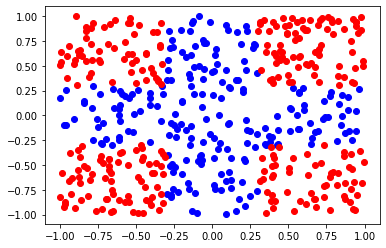

<Figure size 432x288 with 0 Axes>

In [31]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]] == -1, enumerate(X)))))[:,1], color='red')
plt.show()
plt.clf()

### Linear model (simple)

In [71]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("Before training:", test_before)

train_linear_classification_model(p_model, input_dim, X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [0, 0])

print("After training:",test_after)

Before training: -1.0
After training: -1.0


### Linear model (advanced)

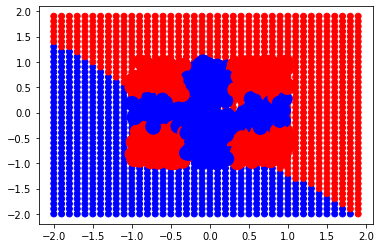

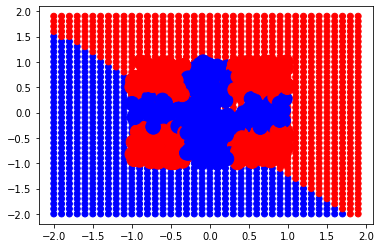

Prediction: -1.0


In [72]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-2, 2, 0.1) for x2 in np.arange(-2, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_classification_model(model, input_dim, X, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

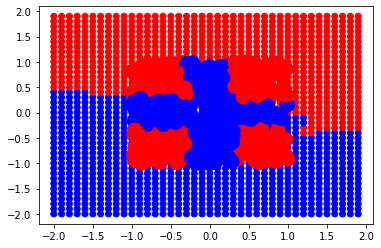

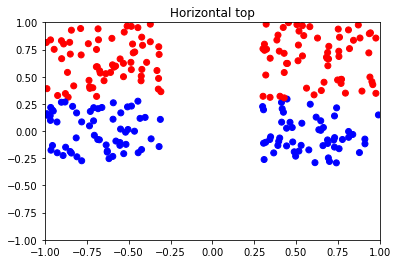

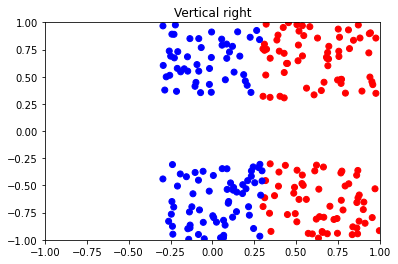

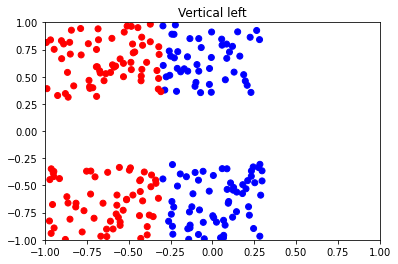

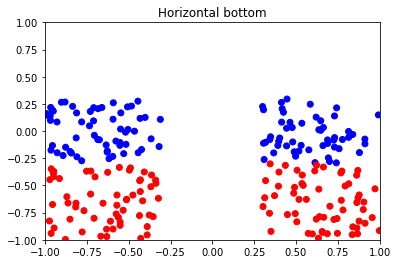

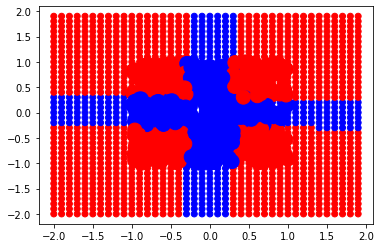

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ml import *


X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])

input_dim = len(X[0])

model_vl = create_linear_model(input_dim)
model_vr = create_linear_model(input_dim)
model_ht = create_linear_model(input_dim)
model_hb = create_linear_model(input_dim)


test_dataset = [[x1, x2] for x1 in np.arange(-2, 2, 0.1) for x2 in np.arange(-2, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs_vl = [predict_linear_model_classif(model_vl, input_dim,  p)  for p in test_dataset]
predicted_outputs_vr = [predict_linear_model_classif(model_vr, input_dim,  p)  for p in test_dataset]
predicted_outputs_ht = [predict_linear_model_classif(model_ht, input_dim,  p)  for p in test_dataset]
predicted_outputs_hb = [predict_linear_model_classif(model_hb, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if (vl == 1 and vr == 1) or (ht == 1 and hb == 1) else 'red' for (vl, vr, ht, hb) in zip(predicted_outputs_vl, predicted_outputs_vr, predicted_outputs_ht, predicted_outputs_hb)]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

#df = pd.DataFrame(data={"x0": X[:, 0], "x1": X[:, 1], "y":Y})
#df.head()
ht = np.array([[x[0],x[1],n] for n,x in enumerate(X) if (x[1] > -0.3 and (x[0] > 0.3 or x[0] < -0.3) ) ])
c = ["blue" if Y[int(n)] == 1 else "red" for n in ht[:, 2]]
plt.scatter(ht[:, 0], ht[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Horizontal top")
plt.show()

vr = np.array([[x[0],x[1], int(n)] for n,x in enumerate(X) if x[0] > -0.3 and (x[1] > 0.3 or x[1] < -0.3) ])
c = ["blue" if Y[int(n)] == 1 else "red" for n in vr[:, 2]]
plt.scatter(vr[:, 0], vr[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Vertical right")
plt.show()

vl = np.array([[x[0],x[1],int(n)] for n,x in enumerate(X) if (x[0] < 0.3 and (x[1] < -0.3 or x[1] > 0.3))])
c = ["blue" if Y[int(n)] == 1 else "red" for n in vl[:, 2]]
plt.scatter(vl[:, 0], vl[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Vertical left")
plt.show()

hb = np.array([[x[0],x[1],int(n)] for n,x in enumerate(X) if (x[1] < 0.3 and (x[0] < -0.3 or x[0] > 0.3))])
c = ["blue" if Y[int(n)] == 1 else "red" for n in hb[:, 2]]
plt.scatter(hb[:, 0], hb[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Horizontal bottom")
plt.show()


# On était bloqué la wola
train_linear_classification_model(model_vl, input_dim, vl[:, :-1], Y[vl[:,-1].astype(int)], epochs=100000)
train_linear_classification_model(model_vr, input_dim, vr[:, :-1], Y[vr[:,-1].astype(int)], epochs=100000)
train_linear_classification_model(model_ht, input_dim, ht[:, :-1], Y[ht[:,-1].astype(int)], epochs=100000)
train_linear_classification_model(model_hb, input_dim, hb[:, :-1], Y[hb[:,-1].astype(int)], epochs=100000)


predicted_outputs_vl = [predict_linear_model_classif(model_vl, input_dim,  p)  for p in test_dataset]
predicted_outputs_vr = [predict_linear_model_classif(model_vr, input_dim,  p)  for p in test_dataset]
predicted_outputs_ht = [predict_linear_model_classif(model_ht, input_dim,  p)  for p in test_dataset]
predicted_outputs_hb = [predict_linear_model_classif(model_hb, input_dim,  p)  for p in test_dataset]

predicted_outputs_colors = ['blue' if (vl == 1 and vr == 1) or (ht == 1 and hb == 1) else 'red' for (vl, vr, ht, hb) in zip(predicted_outputs_vl, predicted_outputs_vr, predicted_outputs_ht, predicted_outputs_hb)]

plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()



destroy_linear_model(model_vl)
destroy_linear_model(model_vr)
destroy_linear_model(model_ht)
destroy_linear_model(model_hb)

### MLP (simple)

In [112]:
input_dim = [len(X[0]), len(X[0])*2, 1]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [0, 0])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [0, 0])

print("After training:", test_after)

Before training: [0.7528486]
After training: [-0.06094664]


### MLP (advanced)

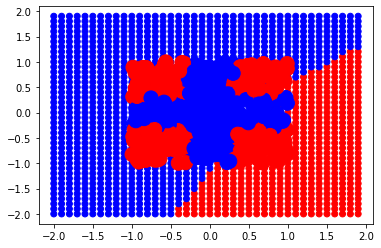

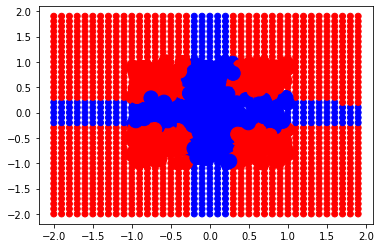

Prediction after training of [1, 1], the result need to be equal to 1. Result: [0.08187903]


In [120]:
model = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-2, 2, 0.1) for x2 in np.arange(-2, 2, 0.1)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y, epochs=200000)

predicted_outputs = [predict_mlp_model_classification(model,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label >= 0 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_mlp_model_classification(p_model , [1, 1])

print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### Multi Linear 3 classes :
        Linear Model x3 : OK
        MLP (2, 3)      : OK

In [24]:
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X])

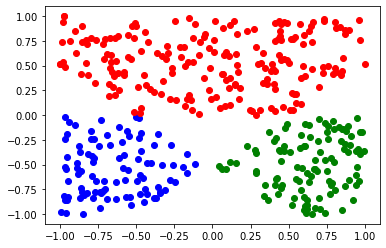

<Figure size 432x288 with 0 Axes>

In [25]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

In [4]:
print(X[:5], Y[:5])

[[ 0.58389062 -0.57930656]
 [ 0.65871632 -0.13741286]
 [ 0.66242407  0.14020618]
 [-0.42338776 -0.36411343]
 [-0.52556537  0.28795143]] [[0 0 1]
 [0 0 1]
 [0 0 0]
 [1 0 0]
 [0 1 0]]


### Linear model (simple)

In [5]:
input_dim = 2

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim, [-0.75, -0.50])

print("Before training:", test_before)

flattened_Y = Y[-1].flatten()

train_linear_classification_model(p_model, input_dim, X, flattened_Y)

test_after = predict_linear_model_classif(p_model, input_dim, [-0.75, -0.50])

print("After training:",test_after)

Before training: 1.0
After training: -1.0


### Linear model (advanced)

In [6]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(1, 2) for x2 in range(1, 2)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_classification_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)


destroy_linear_model(model)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

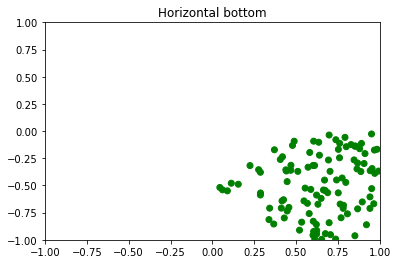

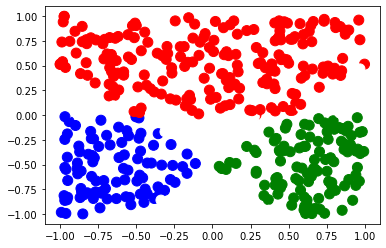

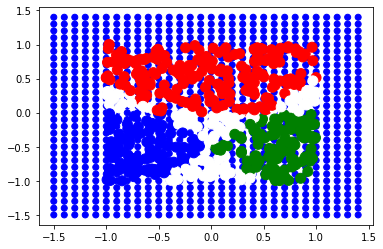

In [36]:
model_dr = create_linear_model(input_dim)
model_dl = create_linear_model(input_dim)
model_v = create_linear_model(input_dim)

test_dataset = [[x1, x2] for x1 in np.arange(-1.5, 1.5, 0.1) for x2 in np.arange(-1.5, 1.5, 0.1)]
colors = ["blue" if output[0] == 1 else ("red" if output[1] == 1 else ("green" if output[2] == 1 else "white")) for output in Y]

"""
hb = np.array([[x[0],x[1],int(n)] for n,x in enumerate(X) if (x[1] < 0.3 and (x[0] < -0.3 or x[0] > 0.3))])
c = ["blue" if Y[int(n)] == 1 else "red" for n in hb[:, 2]]
plt.scatter(hb[:, 0], hb[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Horizontal bottom")
plt.show()

if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0

"""

#dr = np.array([[x[0], x[1], int(n)] for n,x in enumerate(X) if (-x[0]-x[1]-0.5 < 0 and p[1] < 0 and p[0]-p[1]-0.5 > 0)])
c = ["green" if y[2] == 1 else "white" for y in Y]
#print(c)
plt.scatter(X[:, 0], X[:, 1], c=c)
plt.axis([-1, 1, -1, 1])
plt.title("Horizontal bottom")
plt.show()

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p) for p in test_dataset]
colors = ["blue" if output[0] == 1 else ("red" if output[1] == 1 else ("green" if output[2] == 1 else "white")) for output in Y]
#plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()

"""
flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

flattened_dataset_outputs = []
for p in Y:
    flattened_dataset_outputs.append(p[0])
    flattened_dataset_outputs.append(p[1])
    flattened_dataset_outputs.append(p[2])
    
"""

train_linear_classification_model(model, input_dim, X, flattened_dataset_outputs)
train_linear_classification_model(model, input_dim, X, flattened_dataset_outputs)
train_linear_classification_model(model, input_dim, X, flattened_dataset_outputs)


predicted_outputs = [predict_linear_model_classif(model,input_dim,  p) for p in test_dataset]
colors = ["blue" if output[0] == 1 else ("red" if output[1] == 1 else ("green" if output[2] == 1 else "white")) for output in Y]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()

### MLP (simple)

In [5]:
input_dim = [len(X[0]), 3]

p_model, len_output_layer = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, len_output_layer, [-0.75, -0.50])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y.flatten())

test_after = predict_mlp_model_classification(p_model, len_output_layer, [-0.75, -0.50])

print("After training:", test_after)

Before training: [0.78296995 0.79842407 0.5558102 ]
After training: [0.5443395  0.30518296 0.09821115]


### MLP (advanced)

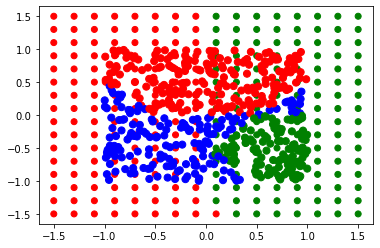

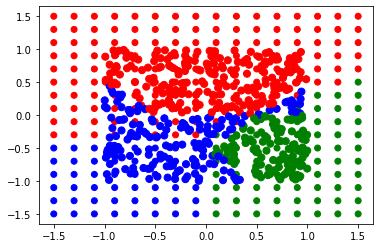

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from ml import *

input_dim = [len(X[0]), 3]

model, len_output_layer = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-1.5, 1.6, 0.2) for x2 in np.arange(-1.5, 1.6, 0.2)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in Y]

predicted_outputs = [predict_mlp_model_classification(model, len_output_layer, p)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=50)
plt.show()

#flattened_dataset_inputs = []
#for p in X:
#    flattened_dataset_inputs.append(p[0])
#    flattened_dataset_inputs.append(p[1])

train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y.flatten())

predicted_outputs = [predict_mlp_model_classification(model, len_output_layer, p)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=50)
plt.show()

#test_after = predict_mlp_model_classification(p_model , [1, 1])

#print("Prediction after training of [1, 1], the result need to be equal to 1. Result:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_mlp_model(model)

### Multi Cross :
        Linear Model x3 : KO
        MLP (2, ?, ?, 3): OK

In [13]:
X = np.random.random((1000, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])

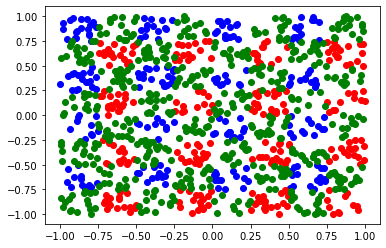

<Figure size 432x288 with 0 Axes>

In [14]:
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][0] == 1, enumerate(X)))))[:,1], color='blue')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][1] == 1, enumerate(X)))))[:,1], color='red')
plt.scatter(np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,0], np.array(list(map(lambda elt : elt[1], filter(lambda c: Y[c[0]][2] == 1, enumerate(X)))))[:,1], color='green')
plt.show()
plt.clf()

### Linear model (simple)

In [ ]:
input_dim = len(X[0])

p_model = create_linear_model(input_dim)
test_before = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("Before training:", test_before)

flattened_X = X.flatten()

train_linear_classification_model(p_model, input_dim, flattened_X, Y)


test_after = predict_linear_model_classif(p_model, input_dim , [2, 2])

print("After training:",test_after)

### Linear model (advanced)

In [66]:
model = create_linear_model(input_dim)
test_dataset = [[x1, x2] for x1 in range(1, 2) for x2 in range(1, 2)]
colors = ["blue" if output >= 0 else "red" for output in Y]

predicted_outputs = [predict_linear_model_classif(model, input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

train_linear_classification_model(model, input_dim, flattened_dataset_inputs, Y)

predicted_outputs = [predict_linear_model_classif(model,input_dim,  p)  for p in test_dataset]
predicted_outputs_colors = ['blue' if label == 1 else 'red' for label in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=200)
plt.show()

test_after = predict_linear_model_classif(p_model, input_dim , [1.25, 1.25])

print("Prediction:", test_after)

flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])
    flattened_dataset_inputs.append(p[1])

destroy_linear_model(model)

ArgumentError: argument 1: <class 'TypeError'>: wrong type

### MLP (simple)

In [61]:
input_dim = [len(X[0]),2,2,3]

p_model = create_mlp_model(input_dim)
test_before = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("Before training:", test_before)

train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X, Y)

test_after = predict_mlp_model_classification(p_model, [2.5, 2.5])

print("After training:", test_after)

TypeError: predict_mlp_model_classification() missing 1 required positional argument: 'sample_input'

### MLP (advanced)

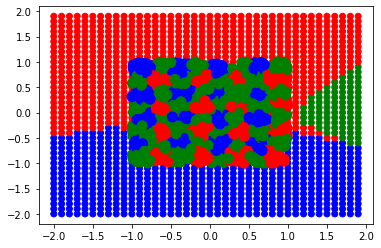

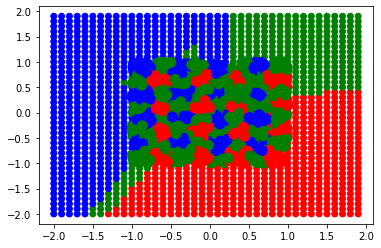

In [20]:
input_dim = [len(X[0]),26,26,3]


model, len_output_layer = create_mlp_model(input_dim)
test_dataset = [[x1, x2] for x1 in np.arange(-2, 2,0.1) for x2 in np.arange(-2, 2, 0.1)]
colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in Y]

predicted_outputs = [predict_mlp_model_classification(model, len_output_layer, p)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()


train_classification_stochastic_gradient_backpropagation_mlp_model(model, X, Y.flatten(), alpha=0.01, epochs=100000)

predicted_outputs = [predict_mlp_model_classification(model,len_output_layer, p)  for p in test_dataset]
predicted_outputs_colors = ["blue" if np.argmax(output) == 0 else ("red" if np.argmax(output) == 1 else "green") for output in predicted_outputs]
plt.scatter([p[0] for p in test_dataset], [p[1] for p in test_dataset], c=predicted_outputs_colors)
plt.scatter([p[0] for p in X], [p[1] for p in X], c=colors, s=100)
plt.show()


destroy_mlp_model(model)

## Régression

### Linear Simple 2D :
        Linear Model : OK
        MLP (1, 1)   : OK

In [2]:
X = np.array([
      [1],
      [2]
])
Y = np.array([
      2,
      3
])

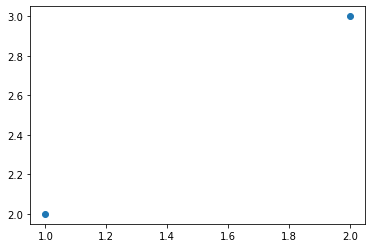

<Figure size 432x288 with 0 Axes>

In [3]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear model (simple)

In [39]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [3])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [3])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

before: 2.7309999465942383
after: 4.0


### Linear model (advanced)

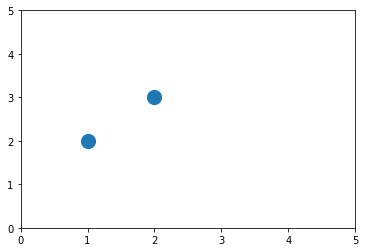

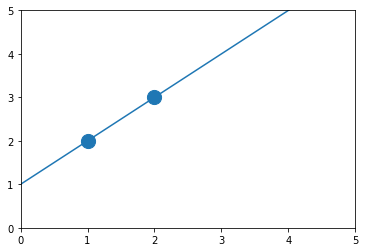

In [5]:
input_dim = len(X[0])

model = create_linear_model(input_dim)
flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 5, 0, 5])
plt.show()

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 5, 0, 5])
plt.show()

destroy_linear_model(model)

### MLP (simple)

In [56]:
model = create_mlp_model([1, 1])    

test_before = predict_mlp_model_regression(model, [3])[0]

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y)

test_after = predict_mlp_model_regression(model, [3])[0]

print("before:", test_before)
print("after:", test_after)

destroy_mlp_model(model)

before: -0.9920000433921814
after: 4.094396114349365


### MLP (advanced)

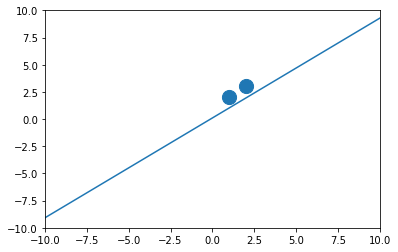

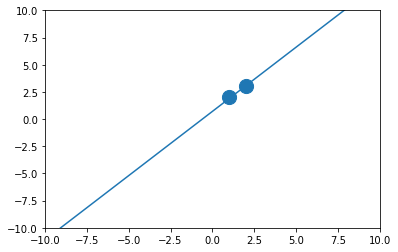

In [31]:
model = create_mlp_model([1, 1])    

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([-10, 10, -10, 10])
plt.show()

### Non Linear Simple 2D :
        Linear Model    : OK
        MLP (1, ?, 1)   : OK

In [57]:
X = np.array([
      [1],
      [2],
      [3]
])
Y = np.array([
      2,
      3,
      2.5
])

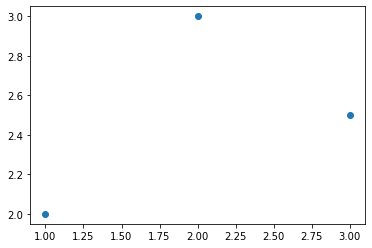

<Figure size 432x288 with 0 Axes>

In [58]:
plt.scatter(X,Y)
plt.show()
plt.clf()

### Linear model (simple)

In [59]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [3])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [3])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

before: -0.35500001907348633
after: 2.75


### Linear model (advanced)

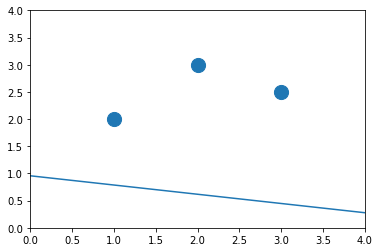

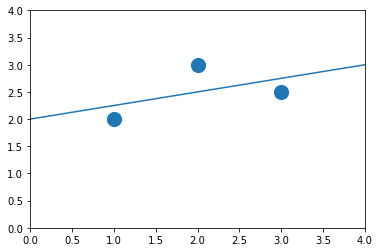

In [60]:
input_dim = len(X[0])

model = create_linear_model(input_dim)
flattened_dataset_inputs = []
for p in X:
    flattened_dataset_inputs.append(p[0])

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 4, 0, 4])
plt.show()

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 4, 0, 4])
plt.show()

destroy_linear_model(model)

### MLP (simple)

In [61]:
model = create_mlp_model([1, 1, 1])    

test_before = predict_mlp_model_regression(model, [3])[0]

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y)

test_after = predict_mlp_model_regression(model, [3])[0]

print("before:", test_before)
print("after:", test_after)

destroy_mlp_model(model)

before: 0.3026319742202759
after: 2.6133556365966797


### MLP (advanced)

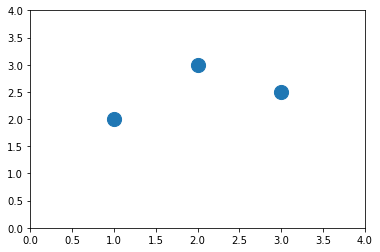

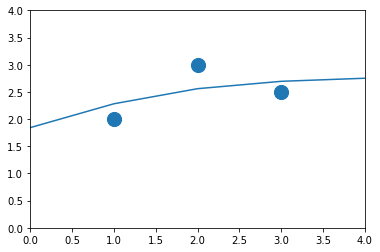

In [107]:
model = create_mlp_model([1, 2, 1])    

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0,4,0,4])
plt.show()

train_regression_stochastic_gradient_backpropagation_mlp_model(model, 
                                                               X, 
                                                               Y)

test_dataset_inputs = [i for i in range(-10, 11)]
predicted_outputs = [predict_mlp_model_regression(model, [p])[0]  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0,4,0,4])
plt.show()

### Linear Simple 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [112]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 1]
])
Y = np.array([
      2,
      3,
      2.5
])

<ipython-input-113-c937507895e9>:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


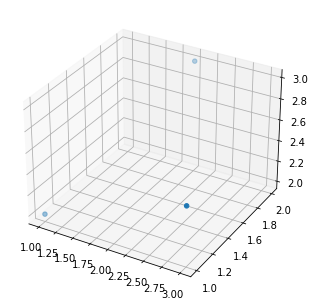

<Figure size 432x288 with 0 Axes>

In [113]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Linear model (simple)

In [125]:
input_dim = len(X[0])

model = create_linear_model(input_dim)

flattened_dataset_inputs = np.array(X).flatten()

test_before = predict_linear_model_regression(model, input_dim, [1, 1])

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_after = predict_linear_model_regression(model, input_dim, [1, 1])

print("before:", test_before)
print("after:", test_after)

destroy_linear_model(model)

before: -0.07999998331069946
after: 1.625


### Linear model (advanced)

[0 1 2 3 4 5] [0 1 2 3 4 5]
[0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5 0 1 2 3 4 5] [0 0 0 0 0 0 1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5] [-0.70099998 -1.34899998 -1.99699998 -2.64499998 -3.29300022 -3.94100046]


ValueError: Argument Z must be 2-dimensional.

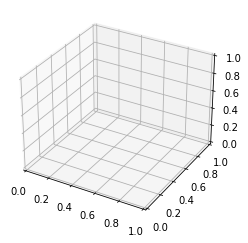

In [160]:
input_dim = len(X[0])

model = create_linear_model(input_dim)
#flattened_dataset_inputs = []
#for p in X:
#    flattened_dataset_inputs.append(p[0])
    
flattened_dataset_inputs = np.array(X).flatten()

test_dataset_inputs = np.array([i for i in range(6)])
test_di = np.array([i for i in range(6)])
predicted_outputs = np.array([predict_linear_model_regression(model, input_dim, [p, x])  for p, x in zip(test_dataset_inputs, test_di)])

print(test_dataset_inputs, test_dataset_inputs)

x2, y2 = np.meshgrid(test_dataset_inputs, test_dataset_inputs)

print(x2.flatten(), y2.flatten(), predicted_outputs)
#print(test_dataset_inputs)
#print(predicted_outputs)


ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(x2.flatten(), y2.flatten(), predicted_outputs.flatten())


#ax.plot_surface(test_dataset_inputs, predicted_outputs)
#plt.scatter([p[0] for p in X], Y, s=200)
#plt.axis([0, 4, 0, 4])
#plt.show()

train_linear_regression_model(model, input_dim, flattened_dataset_inputs, Y)

test_dataset_inputs = [i for i in range(0, 6)]
predicted_outputs = [predict_linear_model_regression(model, input_dim, [p])  for p in test_dataset_inputs]

plt.plot(test_dataset_inputs, predicted_outputs)
plt.scatter([p[0] for p in X], Y, s=200)
plt.axis([0, 4, 0, 4])
plt.show()

destroy_linear_model(model)

### MLP (simple)

### MLP (advanced)

### Linear Tricky 3D :
        Linear Model    : OK
        MLP (2, 1)      : OK

In [ ]:
X = np.array([
      [1, 1],
      [2, 2],
      [3, 3]
])
Y = np.array([
      1,
      2,
      3
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()

### Non Linear Simple 3D :
        Linear Model       : KO
        MLP (2, 2, 1)      : OK

In [ ]:
X = np.array([
      [1, 0],
      [0, 1],
      [1, 1],
      [0, 0],
])
Y = np.array([
      2,
      1,
      -2,
      -1
])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0],X[:,1],Y)
plt.show()
plt.clf()